# HW4_Problem2_Random Forests for Image Approximation 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## a. Start with an image of the Mona Lisa.

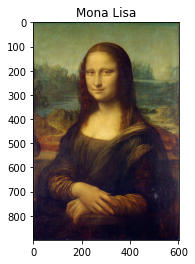

In [2]:
# Read the picture from the relative path
img = plt.imread('mona_lisa.jpeg')
plt.imshow(img)
plt.title("Mona Lisa")
plt.show() # show the image

## b. Preprocessing the input.
We preprocessed the input by uniformly sampling 5,000 random (x,y) coordinate locations. And we didn't take any further preprocessing steps such as mean subtraction, standardization, or unit-normalization. These steps were not necessary for random forests inputs since decision trees wouldn't be impacted by the structure of the data.

In [3]:
# preprocessing the input
sample = []
sampleNum = 5000
m, n = img.shape[0], img.shape[1]
# uniformly sample 5,000 random (x, y) coordinate locations
for i in range(sampleNum):
    tmp = []
    tmp.append(np.random.randint(m)) 
    tmp.append(np.random.randint(n))
    sample.append(tmp)
sample = np.array(sample)
print(sample.shape) # (5000, 2)
print(sample) # print out the sample set

(5000, 2)
[[298 236]
 [377 333]
 [782 438]
 ...
 [134 261]
 [250  84]
 [130  36]]


## c. Preprocessing the output
We decided to choose the first method of converting the image to gray scale, and rescale the pixel intensities to lie between 0.0 and 1.0.. But we didn't go any further since method of random forests required few preprocessing steps. And the point of this problem was to reconstruct the given image. The preprocessing we took worked fine for the given context.

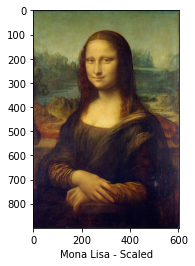

In [19]:
# Rescale the pixel intensities to lie between 0.0 and 1.0.
scaled_img = np.array(img, dtype=float)
for i in range(m):
    for j in range(n):
        scaled_img[i,j] = img[i,j] / 255.0

plt.imshow(scaled_img)
plt.xlabel("Mona Lisa - Scaled")
plt.show()

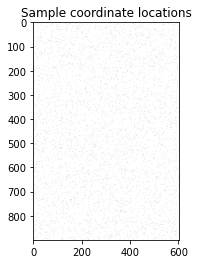

In [5]:
# Sample pixel values at each of the given coordinate locations
sample_point = np.zeros([m, n, 3], dtype = np.uint8)
sample_point.fill(255)
for i in range(sampleNum):
    sample_point[sample[i][0]][sample[i][1]] = scaled_img[sample[i][0]][sample[i][1]]
plt.imshow(sample_point)
plt.title("Sample coordinate locations")
plt.show() 

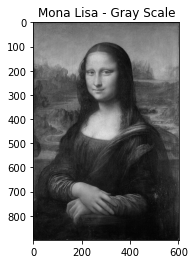

In [21]:
# Convert the scaled img to greyscale
# reference: https://stackoverflow.com/questions/12201577/how-can-i-convert-an-rgb-image-into-grayscale-in-python
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])
# display the image
scaled_gray_img = rgb2gray(scaled_img)
plt.imshow(scaled_gray_img, cmap = plt.get_cmap('gray'))
plt.title("Mona Lisa - Gray Scale")
plt.show()

## d. Build the final image
We used random forest regressor from sklearn library.

In [7]:
# get the label from sample
label = []
for point in sample:
    label.append(scaled_gray_img[point[0], point[1]])

In [32]:
# run random forest:
# reference: https://scikit-learn.org/stable/modules/
#      generated/sklearn.ensemble.RandomForestRegressor.html 
from sklearn.ensemble import RandomForestRegressor

def random_forest(data, label, img_name, depth = None, n_tree = 1, samples_split = 2):
    rf = RandomForestRegressor(max_depth = depth, n_estimators = n_tree, min_samples_split = samples_split)
    rf.fit(data, label)
    pred = np.zeros([m, n, 3])
    for i in range(m):
        for j in range(n):
            point = [i,j]
            point = np.array(point)
            pred[i,j] = rf.predict(point.reshape(1,-1)) / 255
    # use imshow to view the result    
    plt.title(img_name)
    plt.imshow(pred * 255.0)
    plt.show()
    return pred, rf

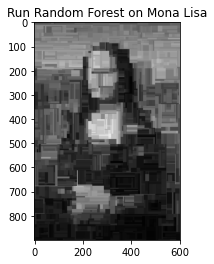

In [11]:
# for each pixel of the output, feed the pixel coordinate through the random forest 
# color the resulting pixel with the output prediction
random_forest(sample, label, "Run Random Forest on Mona Lisa")

## e. Experimentation
### i. Repeat the experiment for a random forest containing a single decision tree, but with depths 1, 2, 3, 5, 10, and 15.

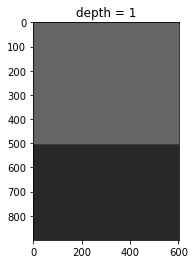

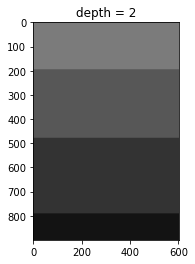

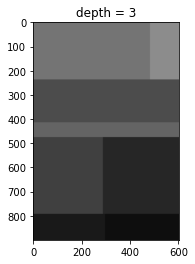

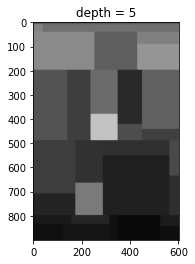

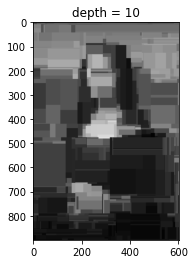

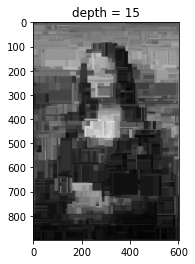

In [12]:
# depths 1, 2, 3, 5, 10, and 15.
depth = [1, 2, 3, 5, 10, 15]
for i in depth:
    img_name = "depth = " + str(i)
    random_forest(sample, label, img_name, depth=i)

### ii. Repeat the experiment for a random forest of depth 7, but with number of trees equal to 1, 3, 5, 10, and 100. 

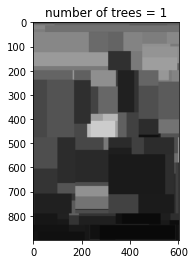

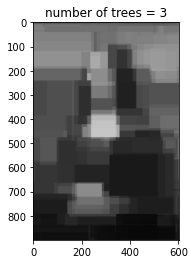

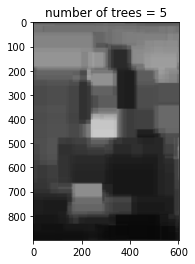

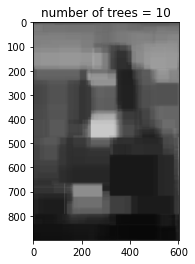

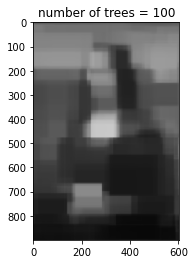

In [15]:
# different number of trees
numTree = [1, 3, 5, 10, 100]
for num in numTree:
    img_name = "number of trees = " + str(num)
    random_forest(sample, label, img_name, n_tree=num, depth=7)

### iii. As a simple baseline, repeat the experiment using a k-NN regressor, for k = 1. This means that every pixel in the output will equal the nearest pixel from the “training set.”

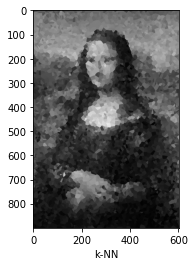

In [16]:
# Reference: https://scikit-learn.org/stable/modules
#                   /generated/sklearn.neighbors.KNeighborsClassifier.html
def kNN(title = "k-NN"):
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(sample, [int(l*255) for l in label])
    predictions = np.zeros([m, n, 3])
    for i in range(m):
        for j in range(n):
            point = [i,j]
            point = np.array(point)
            predictions[i,j] = knn.predict(point.reshape(1,-1)) / 255
    plt.xlabel(title)
    plt.imshow(predictions)
    plt.show()
    return predictions
# run the model
pred_knn = kNN()

### iv. Experiment with different pruning strategies of your choice.

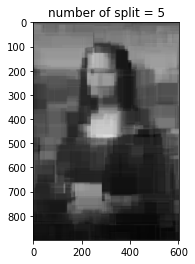

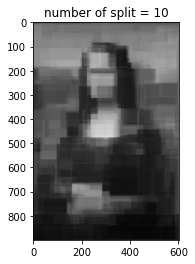

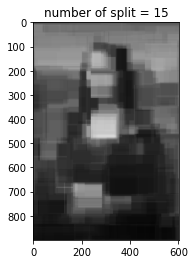

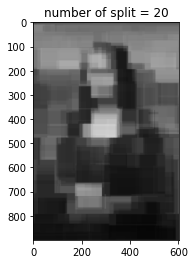

In [33]:
# min_samples_split: [5, 10, 15, 20]
numSplit = [5, 10, 15, 20]
for num in numSplit:
    img_name = "number of split = " + str(num)
    random_forest(sample, label, img_name, n_tree=5, depth=10, samples_split=num)